# Overview

This notebook demonstrates how to calculate and update the Matrix Profile for a sample dataset (this is the same example signal used in https://github.com/aouyang1/go-matrixprofile)

# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and visualize sample data

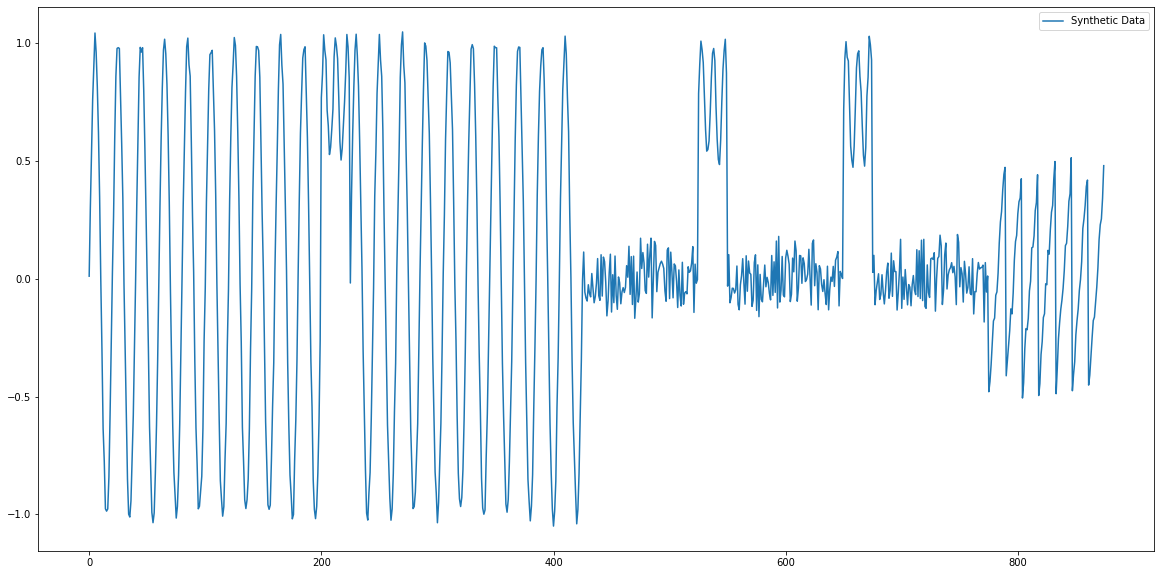

In [3]:
data = pd.read_csv('docs\\examples\\rawdata.csv')
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

# Calculate the Matrix Profile

In [4]:
m = 32
mp = matrixProfile.stomp(pattern,m)

# Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
cac = fluss.fluss(mp[1], m)

Text(0.5, 0, 'Sample')

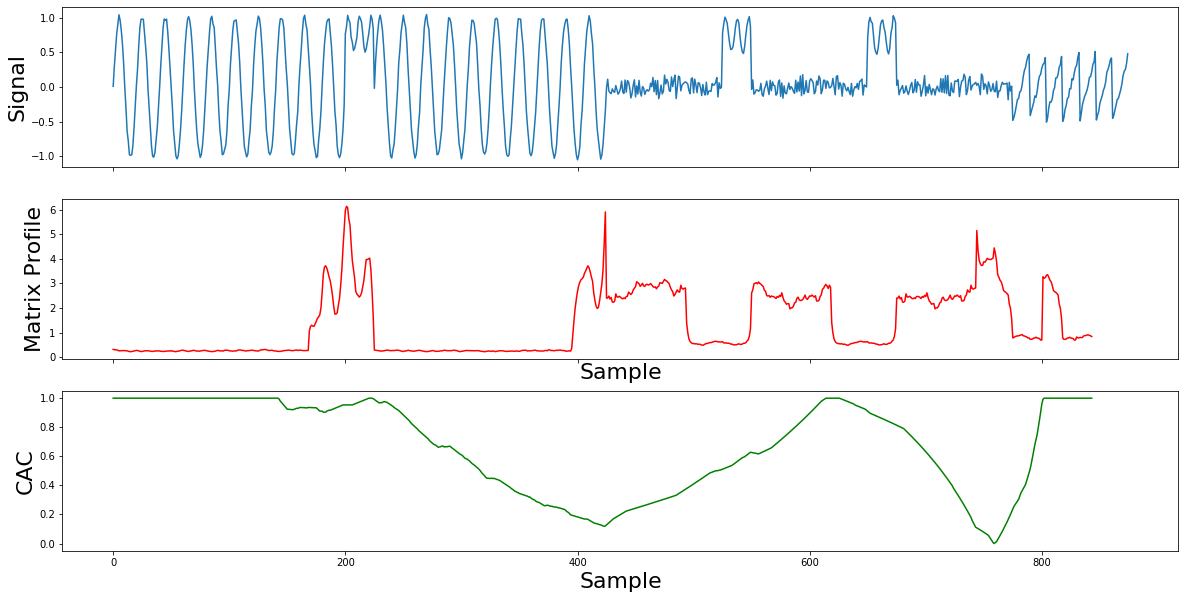

In [5]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#Plot the CAC
ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green')
ax3.set_ylabel('CAC', size=22)
ax3.set_xlabel('Sample', size=22)
